# Морозов Степан Т2

#### T2 Случайная величина имеет экспоненциальный закон распределения
    p(x) = {e^(-x) при x >= 0 | 0 при x <0}
    Сгенерируйте выборку объема n = 25

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
n = 25
lambda1 = 1
sample = np.random.exponential(scale=lambda1, size=n)
sample.sort()
print("Выборка объема 25")
print(sample)

Выборка объема 25
[0.03224106 0.05900754 0.16612776 0.18501468 0.25683497 0.32775475
 0.33486997 0.36992116 0.38469606 0.39865051 0.4354722  0.52562596
 0.87977923 0.90413664 1.24012735 1.26300103 1.35184259 1.51014182
 1.58952044 1.71530029 1.92018875 2.11296836 2.40736698 2.4944569
 3.55192698]


In [16]:
mode = stats.mode(sample, keepdims=True)
print("Мода: ", mode.mode if mode.count > 1 else "все элементы")

Мода:  все элементы


In [17]:
print("Медиана: ", np.median(sample))

Медиана:  0.8797792294702022


In [18]:
print("Размах: ", np.max(sample) - np.min(sample))

Размах:  3.5196859219969396


In [19]:
mean = np.mean(sample)
third_central_moment = np.sum((sample - mean)**3) / n
second_central_moment = np.sum((sample - mean)**2) / n
assimetria_koefficient = third_central_moment / (second_central_moment**(3/2))
print("Коэффициент ассиметрии: ", assimetria_koefficient)

Коэффициент ассиметрии:  0.9387603014666196


/var/folders/57/kt0hrn9s1cvchz123d7kc0140000gn/T/ipykernel_93748/3869939667.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(frameon=True, fontsize=12, loc='lower right')


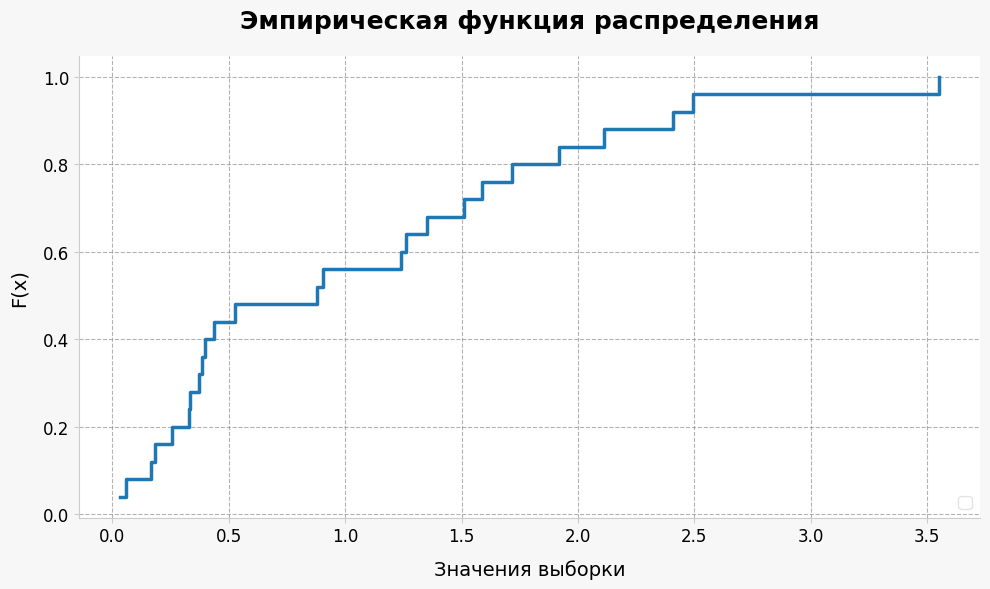

In [20]:
x = np.sort(sample)
y = np.arange(1, len(sample) + 1) / len(sample)


plt.figure(figsize=(10, 6), facecolor='#f7f7f7')
ax = plt.axes()
ax.set_facecolor('#ffffff')


plt.step(x, y, where='post', color='#1f77b4', linewidth=2.5)

plt.title('Эмпирическая функция распределения', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Значения выборки', fontsize=14, labelpad=10)
plt.ylabel('F(x)', fontsize=14, labelpad=10)

ax.grid(True, linestyle='--', alpha=0.6, color='gray')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


ax.tick_params(axis='both', which='both', labelsize=12, color='#cccccc')


legend = plt.legend(frameon=True, fontsize=12, loc='lower right')
legend.get_frame().set_edgecolor('#dddddd')
legend.get_frame().set_facecolor('#ffffff')


for spine in ax.spines.values():
    spine.set_zorder(10)


plt.tight_layout()
plt.show()

/var/folders/57/kt0hrn9s1cvchz123d7kc0140000gn/T/ipykernel_93748/3329440304.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  legend = plt.legend(frameon=True, fontsize=12, loc='upper right')


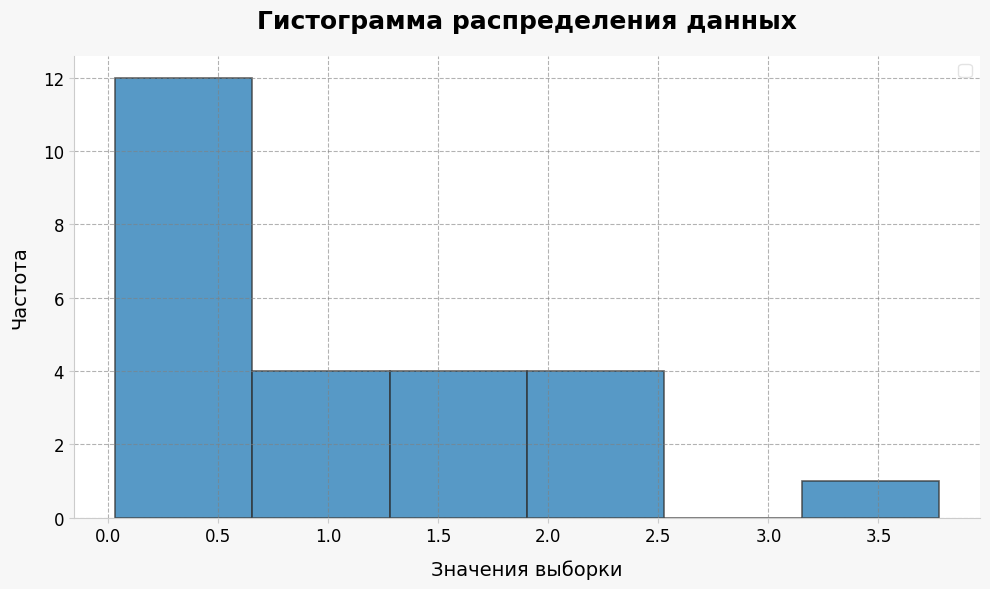

In [21]:
delta = (np.max(sample) - np.min(sample)) / (1+np.log2(n))

plt.figure(figsize=(10, 6), facecolor='#f7f7f7')
ax = plt.axes()
ax.set_facecolor('#ffffff')


plt.hist(sample, bins=np.arange(np.min(sample), np.max(sample) + delta, delta), color='#1f77b4', edgecolor='#333333', linewidth=1.2, alpha=0.75)


plt.title('Гистограмма распределения данных', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Значения выборки', fontsize=14, labelpad=10)
plt.ylabel('Частота', fontsize=14, labelpad=10)


ax.grid(True, linestyle='--', alpha=0.6, color='gray')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


ax.tick_params(axis='both', which='both', labelsize=12, color='#cccccc')


legend = plt.legend(frameon=True, fontsize=12, loc='upper right')
legend.get_frame().set_edgecolor('#dddddd')
legend.get_frame().set_facecolor('#ffffff')


for spine in ax.spines.values():
    spine.set_zorder(10)


plt.tight_layout()
plt.show()

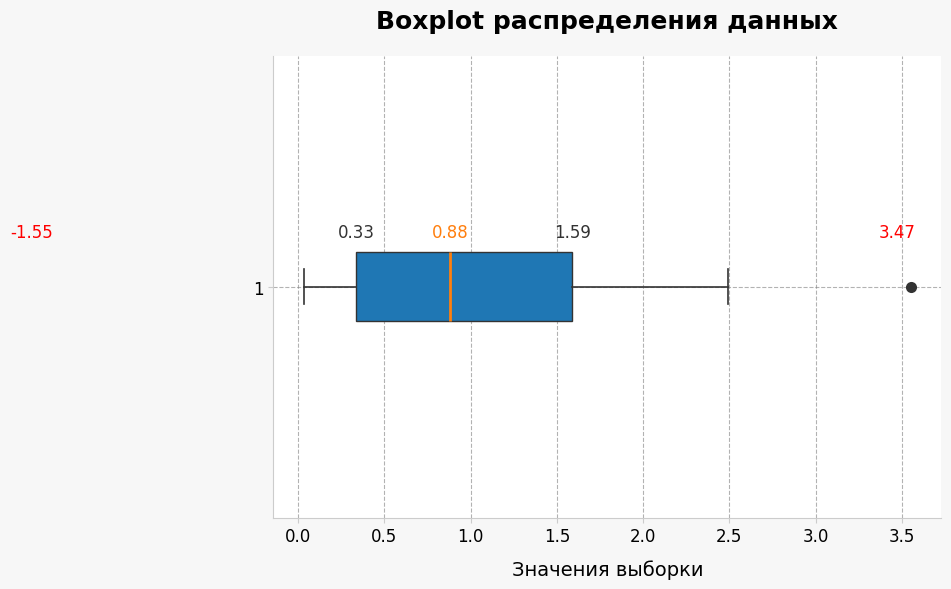

In [22]:
plt.figure(figsize=(10, 6), facecolor='#f7f7f7')
ax = plt.axes()
ax.set_facecolor('#ffffff')


boxplot = ax.boxplot(sample, vert=False, patch_artist=True, whis=1.5,
                     boxprops=dict(facecolor='#1f77b4', color='#333333'),
                     whiskerprops=dict(color='#333333', linewidth=1.2),
                     capprops=dict(color='#333333', linewidth=1.2),
                     medianprops=dict(color='#ff7f0e', linewidth=2),
                     flierprops=dict(marker='o', markersize=8, markerfacecolor='#333333', markeredgecolor='none'))


plt.title('Boxplot распределения данных', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Значения выборки', fontsize=14, labelpad=10)


ax.grid(True, linestyle='--', alpha=0.6, color='gray')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


ax.tick_params(axis='both', which='both', labelsize=12, color='#cccccc')


q1, median, q3 = np.percentile(sample, [25, 50, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


ax.text(q1, 1.1, f'{q1:.2f}', fontsize=12, color='#333333', ha='center', va='bottom')
ax.text(median, 1.1, f'{median:.2f}', fontsize=12, color='#ff7f0e', ha='center', va='bottom')
ax.text(q3, 1.1, f'{q3:.2f}', fontsize=12, color='#333333', ha='center', va='bottom')
ax.text(lower_bound, 1.1, f'{lower_bound:.2f}', fontsize=12, color='red', ha='center', va='bottom')
ax.text(upper_bound, 1.1, f'{upper_bound:.2f}', fontsize=12, color='red', ha='center', va='bottom')


for spine in ax.spines.values():
    spine.set_zorder(10)


plt.tight_layout()
plt.show()

# BOOTSTRAP (среднее арифметическое):

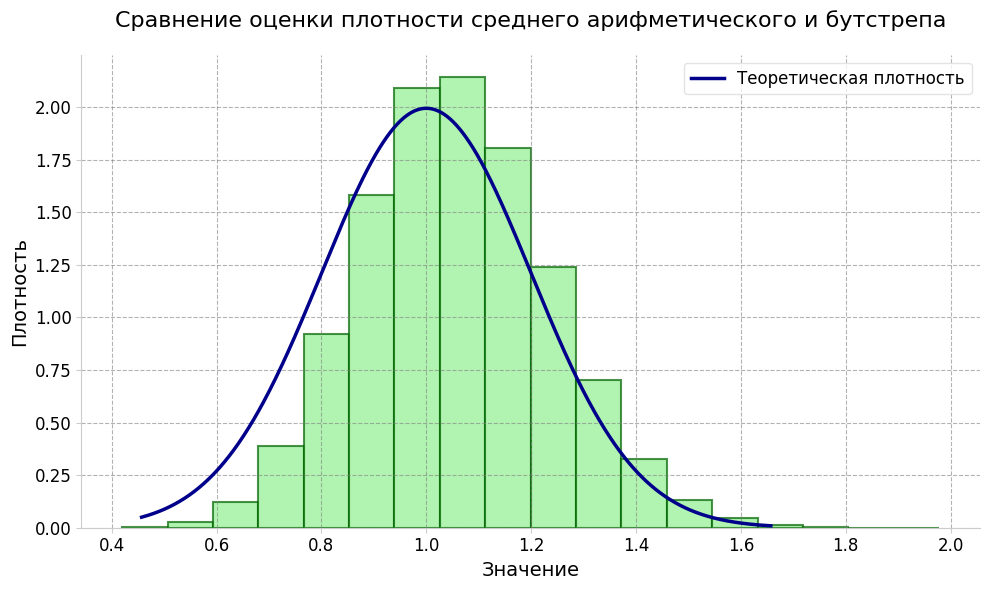

In [23]:
N = 100000


subarrays = np.random.choice(sample, size=(N, n), replace=True)
subarrays_means = np.mean(subarrays, axis=1)


fig, ax = plt.subplots(figsize=(10, 6))
delta = (np.max(subarrays_means) - np.min(subarrays_means)) / (1 + np.log2(len(subarrays_means)))
ax.hist(subarrays_means, bins=np.arange(np.min(subarrays_means), np.max(subarrays_means) + delta, delta),
        density=True, color='lightgreen', edgecolor='darkgreen', linewidth=1.5, alpha=0.7)


x = np.linspace(np.mean(subarrays_means) - 3 * 1/5, np.mean(subarrays_means) + 3 * 1/5, 1000)
y = (5 / (2 * np.pi)**(1/2)) * np.exp(-25/2 * (x - 1)**2)
ax.plot(x, y, 'darkblue', linewidth=2.5, label='Теоретическая плотность')


plt.xlabel('Значение', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.title('Сравнение оценки плотности среднего арифметического и бутстрепа', fontsize=16, pad=20)


ax.grid(True, linestyle='--', alpha=0.6, color='gray')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


ax.tick_params(axis='both', which='both', labelsize=12, color='#cccccc')


legend = plt.legend(frameon=True, fontsize=12, loc='upper right')
legend.get_frame().set_edgecolor('#dddddd')
legend.get_frame().set_facecolor('#ffffff')


plt.tight_layout()
plt.show()

# BOOTSTRAP(коэффициент ассиметрии):

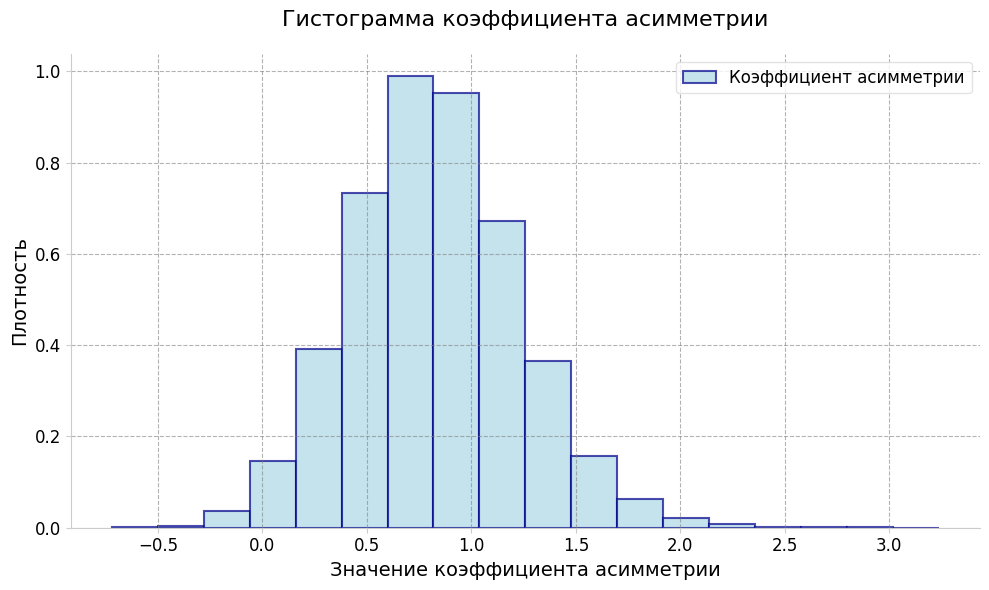

In [24]:
N = 100000


subarrays = np.random.choice(sample, size=(N, n), replace=True)


mean = np.mean(subarrays, axis=1, keepdims=True)
third_central_moment = np.sum((subarrays - mean)**3, axis=1) / subarrays.shape[1]
second_central_moment = np.sum((subarrays - mean)**2, axis=1) / subarrays.shape[1]
asymmetry_coefficient = third_central_moment / (second_central_moment**(3/2))


fig, ax = plt.subplots(figsize=(10, 6))
delta = (np.max(asymmetry_coefficient) - np.min(asymmetry_coefficient)) / (1 + np.log2(len(asymmetry_coefficient)))
ax.hist(asymmetry_coefficient, bins=np.arange(min(asymmetry_coefficient), max(asymmetry_coefficient) + delta, delta),
        density=True, color='lightblue', edgecolor='darkblue', linewidth=1.5, alpha=0.7, label='Коэффициент асимметрии')


plt.xlabel('Значение коэффициента асимметрии', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.title('Гистограмма коэффициента асимметрии', fontsize=16, pad=20)


ax.grid(True, linestyle='--', alpha=0.6, color='gray')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


ax.tick_params(axis='both', which='both', labelsize=12, color='#cccccc')


legend = plt.legend(frameon=True, fontsize=12, loc='upper right')
legend.get_frame().set_edgecolor('#dddddd')
legend.get_frame().set_facecolor('#ffffff')


plt.tight_layout()
plt.show()

In [25]:
probability = np.sum(asymmetry_coefficient < 1) / N
print(f'Вероятность, что коэффициент меньше 1: {probability}')

Вероятность, что коэффициент меньше 1: 0.68285


# BOOTSTRAP (медиана):

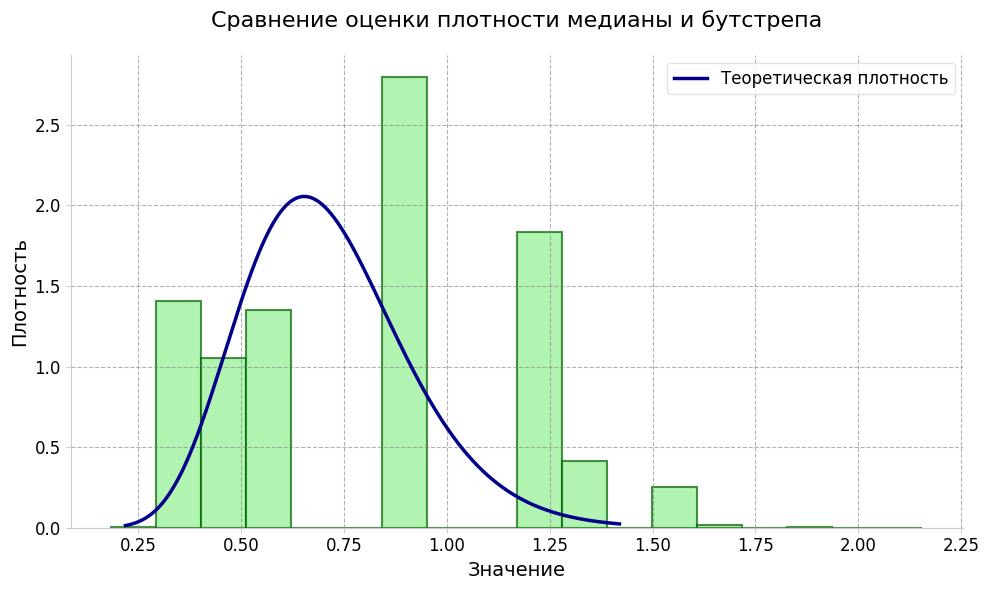

In [35]:
N = 100000


subarrays = np.random.choice(sample, size=(N, n), replace=True)
subarrays_means = np.median(subarrays, axis=1)


fig, ax = plt.subplots(figsize=(10, 6))
delta = (np.max(subarrays_means) - np.min(subarrays_means)) / (1 + np.log2(len(subarrays_means)))
ax.hist(subarrays_means, bins=np.arange(np.min(subarrays_means), np.max(subarrays_means) + delta, delta),
        density=True, color='lightgreen', edgecolor='darkgreen', linewidth=1.5, alpha=0.7)


x = np.linspace(np.mean(subarrays_means) - 3 * 1/5, np.mean(subarrays_means) + 3 * 1/5, 1000)
y = (25 * np.exp(-1 * x) * 2704156 * (1 - np.exp(-1 * x)) ** 12 * (np.exp(-1 * x)) ** 12)
ax.plot(x, y, 'darkblue', linewidth=2.5, label='Теоретическая плотность')


plt.xlabel('Значение', fontsize=14)
plt.ylabel('Плотность', fontsize=14)
plt.title('Сравнение оценки плотности медианы и бутстрепа', fontsize=16, pad=20)


ax.grid(True, linestyle='--', alpha=0.6, color='gray')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')


ax.tick_params(axis='both', which='both', labelsize=12, color='#cccccc')


legend = plt.legend(frameon=True, fontsize=12, loc='upper right')
legend.get_frame().set_edgecolor('#dddddd')
legend.get_frame().set_facecolor('#ffffff')


plt.tight_layout()
plt.show()